# HR Analytics Project

In [4]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import accuracy_score, f1_score
from sklearn.metrics import roc_curve ,roc_auc_score, auc

In [5]:
df=pd.read_csv('hr.csv')
df

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,No,Travel_Frequently,884,Research & Development,23,2,Medical,1,2061,...,3,80,1,17,3,3,5,2,0,3
1466,39,No,Travel_Rarely,613,Research & Development,6,1,Medical,1,2062,...,1,80,1,9,5,3,7,7,1,7
1467,27,No,Travel_Rarely,155,Research & Development,4,3,Life Sciences,1,2064,...,2,80,1,6,0,3,6,2,0,3
1468,49,No,Travel_Frequently,1023,Sales,2,3,Medical,1,2065,...,4,80,0,17,3,2,9,6,0,8


In [6]:
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [7]:
df.tail()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
1465,36,No,Travel_Frequently,884,Research & Development,23,2,Medical,1,2061,...,3,80,1,17,3,3,5,2,0,3
1466,39,No,Travel_Rarely,613,Research & Development,6,1,Medical,1,2062,...,1,80,1,9,5,3,7,7,1,7
1467,27,No,Travel_Rarely,155,Research & Development,4,3,Life Sciences,1,2064,...,2,80,1,6,0,3,6,2,0,3
1468,49,No,Travel_Frequently,1023,Sales,2,3,Medical,1,2065,...,4,80,0,17,3,2,9,6,0,8
1469,34,No,Travel_Rarely,628,Research & Development,8,3,Medical,1,2068,...,1,80,0,6,3,4,4,3,1,2


In [9]:
#To check the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

In [10]:
#to check the missing values
df.isnull().sum()

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

In [11]:
#there is no any missing values

In [12]:
len(df[df.duplicated()])

0

In [13]:
#there is not any duplicate value.

Text(0.5, 1.0, 'Checking imbalance')

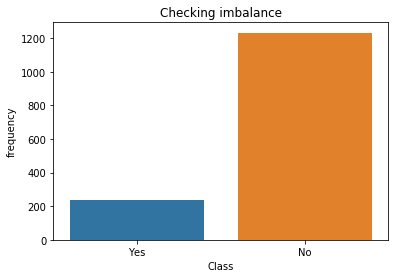

In [14]:
sns.countplot(df["Attrition"])
plt.xlabel("Class")
plt.ylabel("frequency")
plt.title("Checking imbalance")

In [15]:
#here number of employees who is not leaving the job is high

In [16]:
#we are going to scalling the data to deal with variance.

In [17]:
X=df.drop('Attrition',axis=1)

In [18]:
em = pd.get_dummies(X)

In [19]:
em.head()

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,...,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,MaritalStatus_Divorced,MaritalStatus_Married,MaritalStatus_Single,Over18_Y,OverTime_No,OverTime_Yes
0,41,1102,1,2,1,1,2,94,3,2,...,0,0,1,0,0,0,1,1,0,1
1,49,279,8,1,1,2,3,61,2,2,...,0,1,0,0,0,1,0,1,1,0
2,37,1373,2,2,1,4,4,92,2,1,...,0,0,0,0,0,0,1,1,0,1
3,33,1392,3,4,1,5,4,56,3,1,...,0,1,0,0,0,1,0,1,0,1
4,27,591,2,1,1,7,1,40,3,1,...,0,0,0,0,0,1,0,1,1,0


In [22]:
df['Attrition']=LabelEncoder().fit_transform(df['Attrition'])
y=df['Attrition']

In [23]:
x_train, x_test, y_train, y_test = train_test_split(em,y, test_size=0.30, random_state=0)

In [24]:
# now we are going to fit our dataset in various models to confirm the best  model

In [28]:
logistic_Regression = LogisticRegression(max_iter=3000,random_state=0,class_weight="balanced",solver = "saga")
logistic_Regression.fit(x_train,y_train)

C:\Users\admin\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


LogisticRegression(C=1.0, class_weight='balanced', dual=False,
                   fit_intercept=True, intercept_scaling=1, l1_ratio=None,
                   max_iter=3000, multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=0, solver='saga', tol=0.0001, verbose=0,
                   warm_start=False)

In [41]:
y_pred = logistic_Regression.predict(x_test)

In [42]:
#to check accracy score
log = accuracy_score(y_pred,y_test)*100

In [43]:
cmlr=confusion_matrix(y_pred,y_test)
print(cmlr)

[[194  23]
 [177  47]]


In [35]:
## Classification Report that computes various
# metrics like Precision, Recall and F1 Score

In [44]:
print(classification_report(y_pred,y_test))

              precision    recall  f1-score   support

           0       0.52      0.89      0.66       217
           1       0.67      0.21      0.32       224

    accuracy                           0.55       441
   macro avg       0.60      0.55      0.49       441
weighted avg       0.60      0.55      0.49       441



In [45]:
knn = KNeighborsClassifier(n_neighbors=35)
knn.fit(x_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=35, p=2,
                     weights='uniform')

In [39]:
pred_knn = knn.predict(x_test)
KNN = accuracy_score(pred_knn,y_test)*100

In [40]:
cm_knn=confusion_matrix(pred_knn,y_test)
print(cm_knn)

[[371  70]
 [  0   0]]


In [46]:
# Classification Report that computes various
# metrics like Precision, Recall and F1 Score
print(classification_report(pred_knn,y_test))

              precision    recall  f1-score   support

           0       1.00      0.84      0.91       441
           1       0.00      0.00      0.00         0

    accuracy                           0.84       441
   macro avg       0.50      0.42      0.46       441
weighted avg       1.00      0.84      0.91       441



C:\Users\admin\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [47]:
gnb=GaussianNB()
gnb.fit(x_train,y_train)

GaussianNB(priors=None, var_smoothing=1e-09)

In [48]:
pred_gnb = gnb.predict(x_test)
GNB = accuracy_score(pred_gnb,y_test)*100
cm_gnb=confusion_matrix(pred_gnb,y_test)
print(cm_gnb)

[[290  21]
 [ 81  49]]


In [49]:
# Classification Report that computes various 
# metrics like Precision, Recall and F1 Score
print(classification_report(pred_gnb,y_test))

              precision    recall  f1-score   support

           0       0.78      0.93      0.85       311
           1       0.70      0.38      0.49       130

    accuracy                           0.77       441
   macro avg       0.74      0.65      0.67       441
weighted avg       0.76      0.77      0.74       441



In [50]:
svc = SVC(probability=True)
svc.fit(x_train,y_train)
pred_svc = svc.predict(x_test)
SVC = accuracy_score(pred_svc,y_test)*100
cm_svc=confusion_matrix(pred_svc,y_test)
print(cm_svc)

[[371  70]
 [  0   0]]


In [51]:
# Classification Report that computes various 
#metrics like Precision, Recall and F1 Score
print(classification_report(pred_svc,y_test))

              precision    recall  f1-score   support

           0       1.00      0.84      0.91       441
           1       0.00      0.00      0.00         0

    accuracy                           0.84       441
   macro avg       0.50      0.42      0.46       441
weighted avg       1.00      0.84      0.91       441



C:\Users\admin\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [52]:
dtree_en = DecisionTreeClassifier()
clf = dtree_en.fit(x_train,y_train)
pred_dt = clf.predict(x_test)
DTREE = accuracy_score(pred_dt,y_test)*100
cm_dt=confusion_matrix(y_test,pred_dt)
print(cm_dt)

[[325  46]
 [ 42  28]]


In [53]:
# Classification Report that computes various 
# metrics like Precision, Recall and F1 Score
print(classification_report(y_test,pred_dt))

              precision    recall  f1-score   support

           0       0.89      0.88      0.88       371
           1       0.38      0.40      0.39        70

    accuracy                           0.80       441
   macro avg       0.63      0.64      0.63       441
weighted avg       0.81      0.80      0.80       441



In [54]:
GBC=GradientBoostingClassifier(n_estimators=150)
GBC.fit(x_train,y_train)
Y_predict=GBC.predict(x_test)

In [55]:
gbc = accuracy_score(y_test,Y_predict)*100

In [56]:
cm_gbc=confusion_matrix(y_test,Y_predict)
print(cm_gbc)

[[362   9]
 [ 47  23]]


In [57]:
# Classification Report that computes various 
# metrics like Precision, Recall and F1 Score
print(classification_report(y_test,Y_predict))

              precision    recall  f1-score   support

           0       0.89      0.98      0.93       371
           1       0.72      0.33      0.45        70

    accuracy                           0.87       441
   macro avg       0.80      0.65      0.69       441
weighted avg       0.86      0.87      0.85       441



In [58]:
#accuracy of GradientBoostingClassifier is best so best model is GradientBoostingClassifier.